# Import packages and check POPPY's accelerated math options. 

In [1]:
import poppy
import astropy.units as u
import numpy as np
from pathlib import Path
import time

import webbpsf
import os
os.environ['WEBBPSF_PATH'] = str(Path('C:/Users/Kian Milani/Desktop/webbpsf-data')) # set webbpsf path to the data directory
from webbpsf import roman, roman_fresnel
import misc

from importlib import reload
reload(misc); reload(roman); reload(roman_fresnel)

import logging, sys
_log = logging.getLogger('webbpsf')
_log.setLevel("DEBUG")
_log = logging.getLogger('poppy')
_log.setLevel("DEBUG")
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

import poppy.accel_math as am
print(am._USE_NUMEXPR)
print(am._USE_FFTW)
print(am._USE_MKL)
print(am._USE_OPENCL)
print(am._USE_CUDA)
poppy.conf.use_numexpr = True
poppy.conf.use_fftw = True
poppy.conf.use_mkl = True
poppy.conf.use_opencl = False
poppy.conf.use_cuda = False

**WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-034 DOESN'T MATCH THE CURRENT ONLINE VERSION PRDOPSSOC-036
Please consider updating pysiaf, e.g. pip install --upgrade pysiaf or conda update pysiaf
True
True
True
False
False


# Initialize the mode and adjust some options. 

INFO:webbpsf:Data path being used: C:\Users\Kian Milani\Desktop\webbpsf-data/CGI/
INFO:webbpsf:Set the following optical configuration:
INFO:webbpsf:pupil = DISKSPC_PUP, apodizer = DISKSPC_SPM, fpm = ANNULUS, lyotstop = DISKSPC_LS, filter = F825
INFO:webbpsf:Initializing optical elements for the SPC825 mode.
DEBUG:poppy:Trans: C:\Users\Kian Milani\Desktop\webbpsf-data/CGI/optics/F825/pupil_SPC-20181220_1k_rotated.fits
DEBUG:poppy:OPD: None
INFO:poppy:DISKSPC_PUP: Loaded amplitude transmission from C:\Users\Kian Milani\Desktop\webbpsf-data/CGI/optics/F825/pupil_SPC-20181220_1k_rotated.fits
DEBUG:poppy:Trans: C:\Users\Kian Milani\Desktop\webbpsf-data/CGI/optics/F825/SPM_SPC-20181220_1000_rounded9_gray.fits
DEBUG:poppy:OPD: None
INFO:poppy:DISKSPC_SPM: Loaded amplitude transmission from C:\Users\Kian Milani\Desktop\webbpsf-data/CGI/optics/F825/SPM_SPC-20181220_1000_rounded9_gray.fits
DEBUG:poppy:Trans: C:\Users\Kian Milani\Desktop\webbpsf-data/CGI/optics/F825/fpm_0.05lamdivD.fits
DEBUG:po

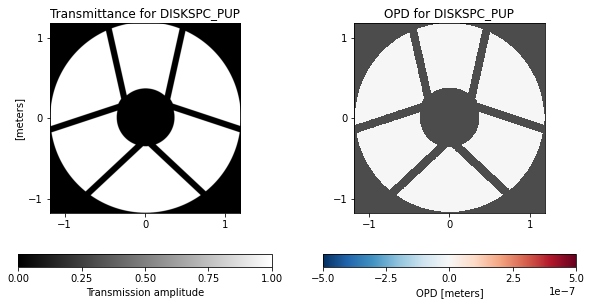

INFO:poppy:Computing both for DM1 Plane (None) sampled onto 512 pixel grid with pixelscale 0.001953125 m / pix
DEBUG:poppy:Display pixel scale = 0.001953125 m / pix 


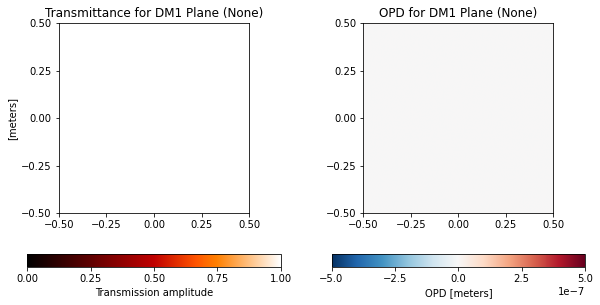

INFO:poppy:Computing both for DM2 Plane (None) sampled onto 512 pixel grid with pixelscale 0.001953125 m / pix
DEBUG:poppy:Display pixel scale = 0.001953125 m / pix 


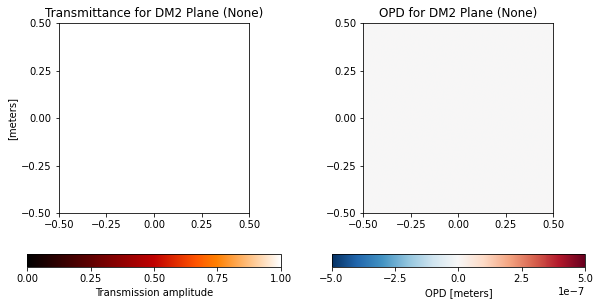

DEBUG:poppy:Display pixel scale = 1.7e-05 m / pix 


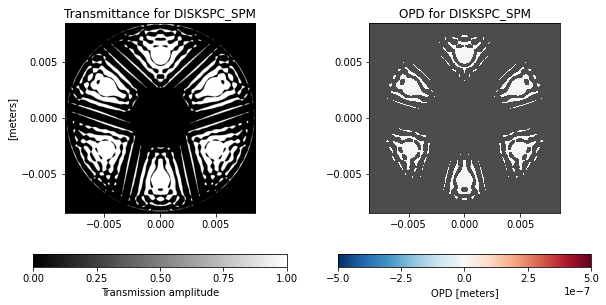

DEBUG:poppy:Display pixel scale = 0.00360017320325374 arcsec / pix 


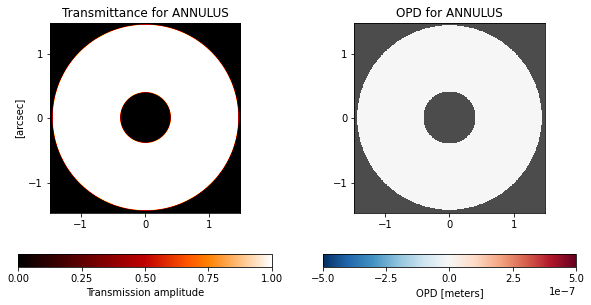

DEBUG:poppy:Display pixel scale = 1.7e-05 m / pix 


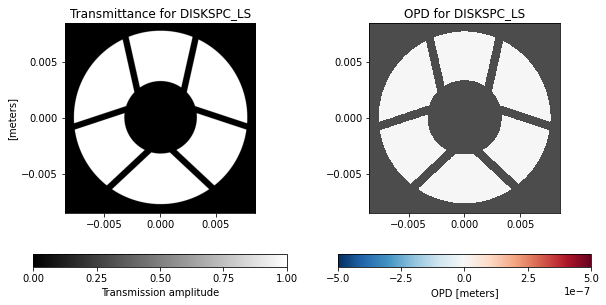

In [7]:
reload(roman_fresnel)
mode = roman_fresnel.CGI_fresnel(mode='SPC825')
mode.options['polaxis'] = 0
mode.options['use_opds'] = False
mode.options['use_dms'] = False
mode.options['use_fieldstop'] = False
mode.options['source_offset_r'] = 0
mode.options['source_offset_theta'] = -90
mode.display()

# Calculate the PSF.

INFO:webbpsf:Initializing optical elements for the SPC825 mode.
DEBUG:poppy:Trans: C:\Users\Kian Milani\Desktop\webbpsf-data/CGI/optics/F825/pupil_SPC-20181220_1k_rotated.fits
DEBUG:poppy:OPD: None
INFO:poppy:DISKSPC_PUP: Loaded amplitude transmission from C:\Users\Kian Milani\Desktop\webbpsf-data/CGI/optics/F825/pupil_SPC-20181220_1k_rotated.fits
DEBUG:poppy:Trans: C:\Users\Kian Milani\Desktop\webbpsf-data/CGI/optics/F825/SPM_SPC-20181220_1000_rounded9_gray.fits
DEBUG:poppy:OPD: None
INFO:poppy:DISKSPC_SPM: Loaded amplitude transmission from C:\Users\Kian Milani\Desktop\webbpsf-data/CGI/optics/F825/SPM_SPC-20181220_1000_rounded9_gray.fits
DEBUG:poppy:Trans: C:\Users\Kian Milani\Desktop\webbpsf-data/CGI/optics/F825/fpm_0.05lamdivD.fits
DEBUG:poppy:OPD: None
INFO:poppy:ANNULUS: Loaded amplitude transmission from C:\Users\Kian Milani\Desktop\webbpsf-data/CGI/optics/F825/fpm_0.05lamdivD.fits
DEBUG:poppy:FITSFPMElement ANNULUS initialized:centering style ADJUSTABLE, central wavelength for 

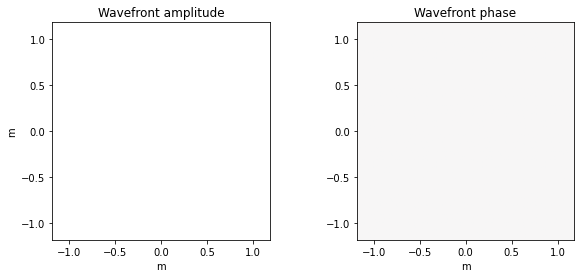

INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy:User requested saving intermediate wavefronts in call to poppy.calc_psf
DEBUG:poppy:Already loaded wisdom prior to this calculation, not reloading.
INFO:poppy: Propagating wavelength = 8.25e-07 m
INFO:poppy:Using user-defined FresnelWavefront() for the input wavefront of the FresnelOpticalSystem().
DEBUG:poppy:Input wavefront has wavelength=0.8250000000000001 microns, npix=1000, diam=2.3633372 m, pixel scale=0.0023633372 m / pix
DEBUG:poppy:  Propagating wavefront to Pupil plane: DISKSPC_PUP  after distance 0.0 m 
DEBUG:poppy:Array shape (1002, 1002) is smaller than desired shape [2000, 2000]; will attempt to zero-pad the array
DEBUG:poppy:  Padded with a 499 x 499 border to  match the desired shape
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: DISKSPC_PUP 
DEBUG:poppy:normalizing at first plane (entrance pupil) to 1.0 total intensity
DEBUG:poppy:  Propagating wavefront to Lens: Primary, with focal length 2.8382792069047

DEBUG:poppy:Applying spherical lens phase =5.06e-09 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: M3
DEBUG:poppy:------ Optic: M3 applied ------
DEBUG:poppy:  Propagating wavefront to Lens: M4, with focal length 0.11623911483359 m after distance 0.943514749358944 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 7.668681433417899 m
DEBUG:poppy:  Spherical to Spherical, Outside Z_R to waist (z_w0) to outside Z_R
DEBUG:poppy:  Starting Pixelscale: 0.00014080132568629623 m / pix
DEBUG:poppy:Spherical to Waist propagation, dz=0.7088415997043249 m
DEBUG:poppy:using mkl_fft FFT of (2000, 2000) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.022350 s, full function  in 0.035 s
DEBUG:poppy:Applying spherical phase curvature =7.09e-01 m
DEBUG:poppy:Applying spherical lens phase =1.41e+00 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:  Intermediate Pixelscale: 2.076664821533653e-06 m / pix
DEBUG:poppy:Waist to 

DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 9.907188071814195 m
DEBUG:poppy:  Spherical to Spherical, Outside Z_R to waist (z_w0) to outside Z_R
DEBUG:poppy:  Starting Pixelscale: 4.023884186771433e-05 m / pix
DEBUG:poppy:Spherical to Waist propagation, dz=0.5033318418958501 m
DEBUG:poppy:using mkl_fft FFT of (2000, 2000) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.020336 s, full function  in 0.028 s
DEBUG:poppy:Applying spherical phase curvature =5.03e-01 m
DEBUG:poppy:Applying spherical lens phase =1.99e+00 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:  Intermediate Pixelscale: 5.159800211561899e-06 m / pix
DEBUG:poppy:Waist to Spherical propagation, dz=0.2646737651981912 m
DEBUG:poppy:Applying spherical phase curvature =2.65e-01 m
DEBUG:poppy:Applying spherical lens phase =3.78e+00 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:using mkl_fft

DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 13.87423066347563 m
DEBUG:poppy:  Spherical to Spherical, Outside Z_R to waist (z_w0) to outside Z_R
DEBUG:poppy:  Starting Pixelscale: 2.7079796073463246e-05 m / pix
DEBUG:poppy:Spherical to Waist propagation, dz=0.7119460795259691 m
DEBUG:poppy:using mkl_fft FFT of (2000, 2000) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.021328 s, full function  in 0.027 s
DEBUG:poppy:Applying spherical phase curvature =7.12e-01 m
DEBUG:poppy:Applying spherical lens phase =1.40e+00 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:  Intermediate Pixelscale: 1.0844902857014155e-05 m / pix
DEBUG:poppy:Waist to Spherical propagation, dz=0.4469515921167915 m
DEBUG:poppy:Applying spherical phase curvature =4.47e-01 m
DEBUG:poppy:Applying spherical lens phase =2.24e+00 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:using mkl_f

DEBUG:poppy: input curved wavefront and OAP6 has output beam curvature of =-7.36e+04 m
DEBUG:poppy:OAP6 has a curvature of =-7.36e+04 m
DEBUG:poppy:OAP6 has a curved output wavefront, with waist at 17.278057427889884 m
DEBUG:poppy:Post Optic Parameters:w_0:8.500e-03 m, z_w0=1.728e+01 m
z=1.625e+01 m, z_r=2.751e+02 m
DEBUG:poppy:Magnification: -134244.28616212297  from R_in = 0.548190990553195 m, R_out = -73591.50820732076 m
DEBUG:poppy:Output beam focal length is now -0.0 m
DEBUG:poppy:Spherical to Planar.
DEBUG:poppy:Applying spherical phase curvature =-1.58e+05 m
DEBUG:poppy:Applying spherical lens phase =-6.35e-06 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: OAP6
DEBUG:poppy:------ Optic: OAP6 applied ------
DEBUG:poppy:  Propagating wavefront to Pupil plane: DISKSPC_LS  after distance 0.687567667550736 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 17.278057427889884 m
DEBUG:poppy:  Plane to Plane Regime, dz=0.687567667550736 m
DEBUG:poppy:  Constant Pixelscale: 1.70

DEBUG:poppy: input flat wavefront and LENS has output beam curvature of =-2.96e-01 m
DEBUG:poppy:LENS has a curvature of =-2.96e-01 m
DEBUG:poppy:LENS has a curved output wavefront, with waist at 19.093165207859226 m
DEBUG:poppy:Post Optic Parameters:w_0:3.070e-05 m, z_w0=1.909e+01 m
z=1.880e+01 m, z_r=3.588e-03 m
DEBUG:poppy:Magnification: -0.0  from R_in = inf m, R_out = -0.296018684431726 m
DEBUG:poppy:Output beam focal length is now 0.0 m
DEBUG:poppy:Inside Rayleigh distance to Outside Rayleigh distance.
DEBUG:poppy:Applying spherical phase curvature =2.01e+03 m
DEBUG:poppy:Applying spherical lens phase =4.96e-04 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: LENS
DEBUG:poppy:------ Optic: LENS applied ------
DEBUG:poppy:  Propagating wavefront to Optic: Fold 4 after distance 0.246017378417573 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 19.093165207859226 m
DEBUG:poppy:  Spherical to Spherical, Outside Z_R to waist (z_w0) to outside Z_R
DEBUG:poppy:  Starting Pixels

<Figure size 1440x1440 with 0 Axes>

INFO:webbpsf:Resampling the PSF using interpolation to a pixelscale of 0.10 lambda/D.
INFO:webbpsf:Magnification required is 5.000, resampling using scipy.ndimage.zoom().
PSF calculation completed in 26.508s.


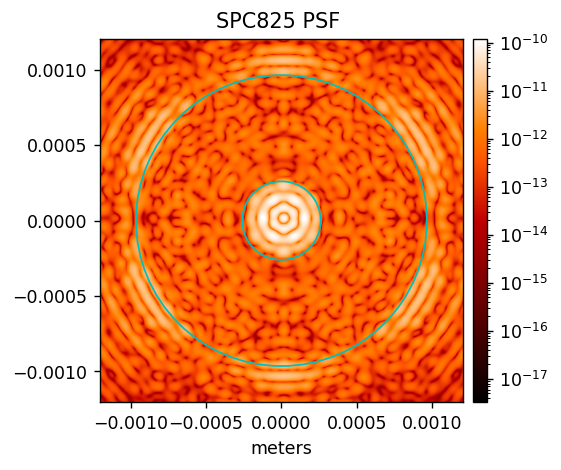

In [8]:
reload(roman_fresnel)
start = time.time()
psf, wfs = mode.calc_psf(display_inwave=True, 
                         display_intermediates=False, 
                         return_intermediates=True)

mode.options['psf_pixelscale'] = 0.1
mode.options['psf_dimension'] = 500
psf_wf, psf_pxscl, mag = mode.resample_psf(wfs[-1], order=3)
print('PSF calculation completed in {:.3f}s.'.format(time.time()-start))
mode.display_psf(psf_wf, psf_pxscl, mag)

In [ ]:
self.primary_opd = poppy.FITSOpticalElement('Primary OPD',
                                            opd=opd_dir+'wfirst_phaseb_PRIMARY_phase_error_V1.0.fits', opdunits='meters', 
                                            planetype=PlaneType.intermediate)
self.g2o_opd = poppy.FITSOpticalElement('G2O OPD',
                                        opd=opd_dir+'wfirst_phaseb_GROUND_TO_ORBIT_4.2X_phase_error_V1.0.fits', opdunits='meters', 
                                        planetype=PlaneType.intermediate)
self.secondary_opd = poppy.FITSOpticalElement('Secondary OPD',
                                              opd=opd_dir+'wfirst_phaseb_SECONDARY_phase_error_V1.0.fits', opdunits='meters', 
                                              planetype=PlaneType.intermediate)
self.fold1_opd = poppy.FITSOpticalElement('Fold-1 OPD',
                                          opd=opd_dir+'wfirst_phaseb_FOLD1_phase_error_V1.0.fits', opdunits='meters',
                                          planetype=PlaneType.intermediate)
self.m3_opd = poppy.FITSOpticalElement('M3 OPD',
                                       opd=opd_dir+'wfirst_phaseb_M3_phase_error_V1.0.fits', opdunits='meters',
                                       planetype=PlaneType.intermediate)
self.m4_opd = poppy.FITSOpticalElement('M4 OPD',
                                       opd=opd_dir+'wfirst_phaseb_M4_phase_error_V1.0.fits', opdunits='meters',
                                       planetype=PlaneType.intermediate)
self.m5_opd = poppy.FITSOpticalElement('M5 OPD',
                                       opd=opd_dir+'wfirst_phaseb_M5_phase_error_V1.0.fits', opdunits='meters', 
                                       planetype=PlaneType.intermediate)
self.fold2_opd = poppy.FITSOpticalElement('Fold-2 OPD',
                                          opd=opd_dir+'wfirst_phaseb_FOLD2_phase_error_V1.0.fits', opdunits='meters',
                                          planetype=PlaneType.intermediate)
self.fsm_opd = poppy.FITSOpticalElement('FSM OPD',
                                        opd=opd_dir+'wfirst_phaseb_FSM_phase_error_V1.0.fits', opdunits='meters', 
                                        planetype=PlaneType.intermediate)
self.oap1_opd = poppy.FITSOpticalElement('OAP1 OPD',
                                         opd=opd_dir+'wfirst_phaseb_OAP1_phase_error_V1.0.fits', opdunits='meters',
                                         planetype=PlaneType.intermediate)
self.focm_opd = poppy.FITSOpticalElement('FOCM OPD',
                                         opd=opd_dir+'wfirst_phaseb_FOCM_phase_error_V1.0.fits', opdunits='meters',
                                         planetype=PlaneType.intermediate)
self.oap2_opd = poppy.FITSOpticalElement('OAP2 OPD',
                                         opd=opd_dir+'wfirst_phaseb_OAP2_phase_error_V1.0.fits', opdunits='meters',
                                         planetype=PlaneType.intermediate)
self.dm1_opd = poppy.FITSOpticalElement('DM1 OPD',
                                        opd=opd_dir+'wfirst_phaseb_DM1_phase_error_V1.0.fits', opdunits='meters',
                                        planetype=PlaneType.intermediate)
self.dm2_opd = poppy.FITSOpticalElement('DM2 OPD',
                                        opd=opd_dir+'wfirst_phaseb_DM2_phase_error_V1.0.fits', opdunits='meters',
                                        planetype=PlaneType.intermediate)
self.oap3_opd = poppy.FITSOpticalElement('OAP3 OPD',
                                         opd=opd_dir+'wfirst_phaseb_OAP3_phase_error_V1.0.fits', opdunits='meters',
                                         planetype=PlaneType.intermediate)
self.fold3_opd = poppy.FITSOpticalElement('Fold-3 OPD',
                                          opd=opd_dir+'wfirst_phaseb_FOLD3_phase_error_V1.0.fits', opdunits='meters',
                                          planetype=PlaneType.intermediate)
self.oap4_opd = poppy.FITSOpticalElement('OAP4 OPD',
                                         opd=opd_dir+'wfirst_phaseb_OAP4_phase_error_V1.0.fits', opdunits='meters',
                                         planetype=PlaneType.intermediate)
self.spm_opd = poppy.FITSOpticalElement('SPM OPD',
                                        opd=opd_dir+'wfirst_phaseb_PUPILMASK_phase_error_V1.0.fits', opdunits='meters',
                                        planetype=PlaneType.intermediate)
self.oap5_opd = poppy.FITSOpticalElement('OAP5 OPD',
                                         opd=opd_dir+'wfirst_phaseb_OAP5_phase_error_V1.0.fits', opdunits='meters',
                                         planetype=PlaneType.intermediate)
self.oap6_opd = poppy.FITSOpticalElement('OAP6 OPD',
                                         opd=opd_dir+'wfirst_phaseb_OAP6_phase_error_V1.0.fits', opdunits='meters',
                                         planetype=PlaneType.intermediate)
self.oap7_opd = poppy.FITSOpticalElement('OAP7 OPD',
                                         opd=opd_dir+'wfirst_phaseb_OAP7_phase_error_V1.0.fits', opdunits='meters',
                                         planetype=PlaneType.intermediate)
self.oap8_opd = poppy.FITSOpticalElement('OAP8 OPD',
                                         opd=opd_dir+'wfirst_phaseb_OAP8_phase_error_V1.0.fits', opdunits='meters',
                                         planetype=PlaneType.intermediate)
self.filter_opd = poppy.FITSOpticalElement('Filter OPD',
                                           opd=opd_dir+'wfirst_phaseb_FILTER_phase_error_V1.0.fits', opdunits='meters',
                                           planetype=PlaneType.intermediate)
self.lens_opd = poppy.FITSOpticalElement('LENS OPD',
                                         opd=opd_dir+'wfirst_phaseb_LENS_phase_error_V1.0.fits', opdunits='meters',
                                         planetype=PlaneType.intermediate)
self.fold4_opd = poppy.FITSOpticalElement('Fold-4 OPD',
                                          opd=opd_dir+'wfirst_phaseb_FOLD4_phase_error_V1.1.fits', opdunits='meters', 
                                          planetype=PlaneType.intermediate)